## Pre-Process the data

In [45]:
import numpy as np
import pandas as pd

reviews = pd.read_csv("data/BA_reviews.csv")

In [46]:
reviews.head()

,Unnamed: 0,reviews
0,0,Not Verified | I flew from Malaga via LHR to...
1,1,✅ Trip Verified | Milan to Miami return via L...
2,2,✅ Trip Verified | BA created a new low-cost s...
3,3,✅ Trip Verified | I flew with British Airway...
4,4,✅ Trip Verified | Manchester to Copenhagen vi...


In [47]:
reviews.columns = ['Rating', 'Review']

In [48]:
reviews.head()

,Rating,Review
0,0,Not Verified | I flew from Malaga via LHR to...
1,1,✅ Trip Verified | Milan to Miami return via L...
2,2,✅ Trip Verified | BA created a new low-cost s...
3,3,✅ Trip Verified | I flew with British Airway...
4,4,✅ Trip Verified | Manchester to Copenhagen vi...


In [49]:
reviews['Review'] = reviews['Review'].apply(lambda x: x.replace("✅ Trip Verified |","")) 

In [50]:
reviews.head()

,Rating,Review
0,0,Not Verified | I flew from Malaga via LHR to...
1,1,Milan to Miami return via London. Worst busi...
2,2,BA created a new low-cost subsidiary in BA E...
3,3,I flew with British Airways from Heathrow t...
4,4,Manchester to Copenhagen via London on 30th ...


In [51]:
reviews['Review'] = reviews['Review'].apply(lambda x: x.replace("Not Verified |","")) 

In [52]:
reviews.head()

,Rating,Review
0,0,I flew from Malaga via LHR to Boston on the...
1,1,Milan to Miami return via London. Worst busi...
2,2,BA created a new low-cost subsidiary in BA E...
3,3,I flew with British Airways from Heathrow t...
4,4,Manchester to Copenhagen via London on 30th ...


In [53]:
reviews.Review.unique().shape

(1000,)

1000 Unique Reviews

## Topic Modelling
Proceed on the basis that data is cleaned and pre-processed

Reference:
https://ourcodingclub.github.io/tutorials/topic-modelling-python/

In [54]:
reviews.head()

,Rating,Review
0,0,I flew from Malaga via LHR to Boston on the...
1,1,Milan to Miami return via London. Worst busi...
2,2,BA created a new low-cost subsidiary in BA E...
3,3,I flew with British Airways from Heathrow t...
4,4,Manchester to Copenhagen via London on 30th ...


In [55]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=0.2, token_pattern = '\w+|\$[\d\.]+|\S+') # transformer to vector form
# max df discards words that are in 90% of reviews - too common
# min df ensures that words in less than 25 reviews will be discarded - no correlation too minor
tf = vectorizer.fit_transform(reviews['Review']).toarray() # applies transformer to our data
tf_feature_names = vectorizer.get_feature_names_out() # provides insight as to what word each column in matrix represent

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
/var/folders/85/ydfq05rn0cj5jsjp7tyvwhww0000gn/T/ipykernel_10623/1173844488.py:3: SyntaxWarning: invalid escape sequence '\w'
  vectorizer = CountVectorizer(max_df=0.9, min_df=0.2, token_pattern = '\w+|\$[\d\.]+|\S+') # transformer to vector form


In [56]:
tf_feature_names
# word frequency : review

array(["'t", ',', 'a', 'after', 'again', 'airline', 'airways', 'all',
       'an', 'are', 'as', 'at', 'ba', 'back', 'be', 'been', 'british',
       'business', 'but', 'by', 'cabin', 'check', 'class', 'crew', 'did',
       'even', 'flight', 'flights', 'food', 'for', 'from', 'get', 'good',
       'had', 'have', 'heathrow', 'hours', 'i', 'if', 'in', 'is', 'it',
       'just', 'london', 'me', 'more', 'my', 'no', 'not', 'of', 'on',
       'one', 'only', 'or', 'other', 'our', 'out', 'seat', 'seats',
       'service', 'so', 'staff', 'that', 'their', 'them', 'then', 'there',
       'they', 'this', 'time', 'up', 'us', 'very', 'was', 'we', 'were',
       'when', 'which', 'with', 'would', 'you'], dtype=object)

Let's now create the model

In [57]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=18)
model.fit(tf)

LatentDirichletAllocation(random_state=18)

In [58]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [59]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,",",1312.9,",",719.2,i,1064.2,i,644.2,they,429.0,we,1147.5,you,487.8,was,959.1,class,386.7,was,883.4
1,ba,455.0,in,444.3,",",538.4,have,279.2,i,399.0,our,594.0,a,338.5,i,822.8,",",371.0,a,631.3
2,a,302.1,was,394.7,my,479.6,a,275.9,my,318.9,us,366.8,is,251.7,a,598.9,business,346.8,",",441.3
3,on,262.9,of,247.7,was,438.8,for,268.9,me,239.1,flight,366.7,are,220.4,of,394.1,is,307.3,flight,417.2
4,flight,233.7,no,224.2,a,351.2,of,246.0,",",171.0,were,360.2,they,212.7,it,363.3,a,236.7,on,411.3
5,of,227.3,check,211.4,flight,318.3,ba,230.4,had,138.6,",",355.0,have,194.7,not,324.9,of,221.6,very,386.1
6,at,177.7,a,181.1,with,270.6,on,185.8,'t,135.2,a,311.6,it,176.2,in,284.1,seat,219.7,were,364.1
7,with,157.3,on,169.6,british,216.6,their,174.4,in,112.4,was,302.2,not,166.3,flight,238.9,in,207.6,crew,345.1
8,my,155.3,at,159.0,airways,214.7,this,153.6,that,104.3,had,286.1,in,160.2,on,231.6,seats,194.0,good,319.4
9,for,151.0,for,139.5,that,200.6,is,145.8,them,93.0,for,264.9,",",151.5,that,228.4,are,125.8,cabin,301.9


This shows that common words in these reviews include BA - abbreviation for British Airways. We can also see that 'no' was a common word, which indicates that reviews often included do, for example a review might be "BA has delayed flights and no good compensation". Typically 'no' inflicts negative connotations, as a result we can expect a large portion of these reviews to have a criticism towards British Airways.

## Sentiment Analysis
Reference:
https://realpython.com/python-nltk-sentiment-analysis/

In [60]:
import nltk
nltk.download(["names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",])

[nltk_data] Downloading package names to
[nltk_data]     /Users/kirisanthiruchelvam/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirisanthiruchelvam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/kirisanthiruchelvam/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/kirisanthiruchelvam/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kirisanthiruchelvam/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kirisanthiruchelvam/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]  

True

For Sentiment Analysis we will use the NLTK's pretrained SentimentAnalyzer also known as VADER. Valence Aware Dictionary and sEntiment Reasoner.

In [61]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Hey, you amazing piece of rubbish")

{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}

In [62]:
def is_positive(review):
    compound_score = sia.polarity_scores(review)['compound']
    if compound_score > 0.5:
        return "strongly"
    elif compound_score > 0.25:
        return "slightly"
    elif compound_score > 0:
        return "barely"
    else:
        return "not"

def is_negative(review):
    compound_score = sia.polarity_scores(review)['compound']
    if compound_score < -0.5:
        return "strongly"
    elif compound_score < -0.25:
        return "slightly"
    elif compound_score < 0:
        return "barely"
    else:
        return "not"
# These are functions to make the logic easier, and is tested below

In [63]:
for review in reviews['Review'][:10]:
    print(f"{review} is {is_positive(review)} positive.\n")
    # here we test to see the positive reviews in 10 reviews, and its depth of positiveness.

   I flew from Malaga via LHR to Boston on the 4th May 2024 and on arrival in Boston discovered my luggage was still in London. Filed a report and now 4 days later no sign of the luggage. The baggage customer service is a joke. Not interested in the clients or giving a good service. Updates are useless. I know my luggage has been sitting in Boston since the 5th as I have an air tag inside it. The airline seem to have no intention of getting my luggage to me. The robots on FB messenger & twitter are useless. I opened a complaint & when I checked the update of my complaint the case had been closed despite never been contacted by a human!! This airline is now a joke and if I ever get my luggage back I doubt I will ever fly with them again. They are now worse than Air Canada in my book and that is saying something. is not positive.

  Milan to Miami return via London. Worst business class ever. The layout of A380 of BA is crazy. The width of seats is outrageous (aisle seats are a shame for

In [64]:
# lets create a pie chart with % of positive and negative reviews with its detailed strengths.
rating_and_no_of_reviews = {"Strongly Positive":0, "Slightly Positive":0, "Barely Positive":0, "Strongly Negative":0, "Slightly Negative":0, "Barely Negative":0}
for review in reviews['Review']:
    if is_positive(review) == "strongly":
        rating_and_no_of_reviews["Strongly Positive"] = (rating_and_no_of_reviews["Strongly Positive"])+1
    elif is_positive(review) == "slightly":
        rating_and_no_of_reviews["Slightly Positive"] = (rating_and_no_of_reviews["Slightly Positive"])+1
    elif is_positive(review) == "barely":
        rating_and_no_of_reviews["Barely Positive"] = (rating_and_no_of_reviews["Barely Positive"])+1
    elif is_positive(review) == "not":
        if is_negative(review) == "strongly":
            rating_and_no_of_reviews["Strongly Negative"] = (rating_and_no_of_reviews["Strongly Negative"])+1
        elif is_negative(review) == "slightly":
            rating_and_no_of_reviews["Slightly Negative"] = (rating_and_no_of_reviews["Slightly Negative"])+1
        elif is_negative(review) == "barely":
            rating_and_no_of_reviews["Barely Negative"] = (rating_and_no_of_reviews["Barely Negative"])+1

In [65]:
print(rating_and_no_of_reviews)

{'Strongly Positive': 405, 'Slightly Positive': 51, 'Barely Positive': 26, 'Strongly Negative': 416, 'Slightly Negative': 54, 'Barely Negative': 43}


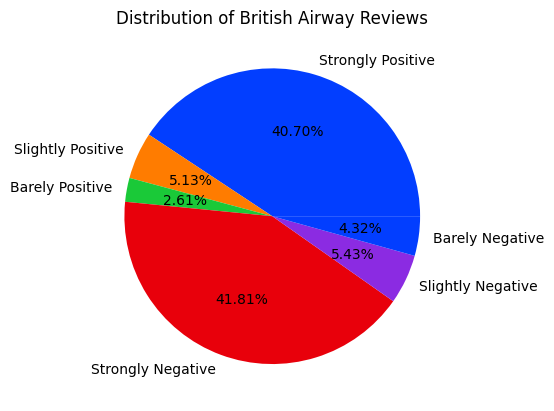

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
review_summary = {"labels" : rating_and_no_of_reviews.keys() ,"values" : rating_and_no_of_reviews.values()}
colors = sns.color_palette('bright')[0:5]
plt.pie(review_summary['values'], labels=review_summary['labels'], colors = colors, autopct='%1.2f%%')
plt.title('Distribution of British Airway Reviews')
plt.show()

## Word Cloud
Reference:
https://www.projectpro.io/recipes/create-word-cloud-python

In [68]:
from wordcloud import WordCloud, STOPWORDS
all_reviews_combined = ""
for review in reviews['Review']:
    all_reviews_combined += "".join(review)

In [69]:
all_reviews_combined

'   I flew from Malaga via LHR to Boston on the 4th May 2024 and on arrival in Boston discovered my luggage was still in London. Filed a report and now 4 days later no sign of the luggage. The baggage customer service is a joke. Not interested in the clients or giving a good service. Updates are useless. I know my luggage has been sitting in Boston since the 5th as I have an air tag inside it. The airline seem to have no intention of getting my luggage to me. The robots on FB messenger & twitter are useless. I opened a complaint & when I checked the update of my complaint the case had been closed despite never been contacted by a human!! This airline is now a joke and if I ever get my luggage back I doubt I will ever fly with them again. They are now worse than Air Canada in my book and that is saying something.  Milan to Miami return via London. Worst business class ever. The layout of A380 of BA is crazy. The width of seats is outrageous (aisle seats are a shame for BA). Length is ok

In [70]:
from PIL import Image
import numpy as np
mask = np.array(Image.open("airplane_shape.png"))

In [71]:
word_cloud = WordCloud(
        random_state=18,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS,
        mask=mask
).generate(all_reviews_combined)

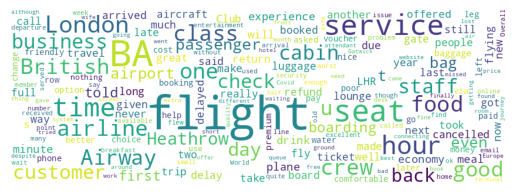

In [72]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()